In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Sales.csv')

In [4]:
df.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df.shape

(913000, 4)

In [6]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
df['date'] =  pd.to_datetime(df['date'])

In [57]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [58]:
df[['store']].nunique()

store    10
dtype: int64

In [59]:
df[['item']].nunique()

item    50
dtype: int64

In [17]:
df.groupby('store').agg({'item': 'nunique'})

,item
store,
1,50
2,50
3,50
4,50
5,50
6,50
7,50
8,50
9,50


# EDA

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

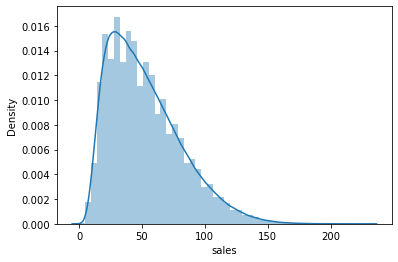

In [60]:
sns.distplot(df['sales'])

In [16]:
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['dayofweek'] = df.date.dt.dayofweek

<AxesSubplot:xlabel='year'>

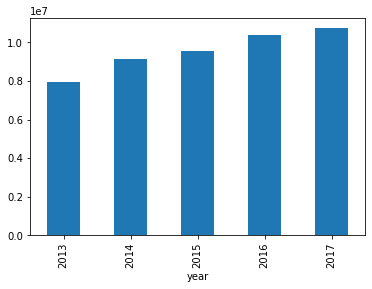

In [15]:
df.groupby(['year'])['sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

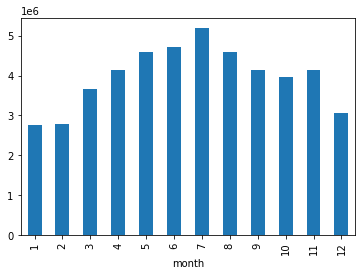

In [14]:
df.groupby(['month'])['sales'].sum().plot(kind='bar')

<AxesSubplot:xlabel='dayofweek'>

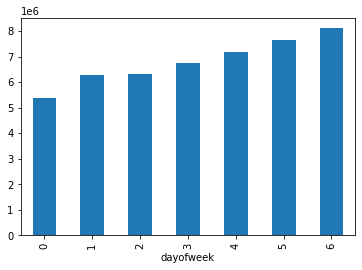

In [17]:
df.groupby(['dayofweek'])['sales'].sum().plot(kind='bar')

In [81]:
#df_SalesYrWise['months'] = df_SalesYrWise['date'].apply(lambda x:x.strftime('%B'))
#df_SalesYrWise.groupby('months')['sales'].sum().plot(ind='bar')
df_SalesYrWise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   sales   913000 non-null  int64
dtypes: int64(1)
memory usage: 13.9 MB


In [24]:
df.groupby(['store','item']).agg({'sales': ['min','max','mean','sum', 'std', 'median']})

#df.groupby(['store', 'item']).agg({'sales': ['sum','mean', 'std', 'median'],})

sales                                          
             min  max       mean     sum        std median
store item                                                
1     1        4   50  19.971522   36468   6.741022   19.0
      2       13  115  53.148959   97050  15.005779   52.0
      3        8   70  33.208105   60638  10.072529   33.0
      4        4   43  19.956188   36440   6.640618   20.0
      5        3   37  16.612815   30335   5.672102   16.0
...          ...  ...        ...     ...        ...    ...
10    46      23  125  66.046550  120601  18.114991   65.0
      47       6   56  24.755750   45204   7.924820   24.0
      48      21  120  57.814896  105570  15.898538   57.0
      49       6   69  33.032311   60317  10.091610   32.0
      50      24  150  74.037240  135192  19.937566   73.0

[500 rows x 6 columns]

In [25]:
daily_sales = df.groupby('date', as_index=False)['sales'].sum()
store_daily_sales = df.groupby(['store', 'date'], as_index=False)['sales'].sum()
item_daily_sales = df.groupby(['item', 'date'], as_index=False)['sales'].sum()

In [47]:
store_daily_sales['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [44]:
store_set=df['store'].unique()

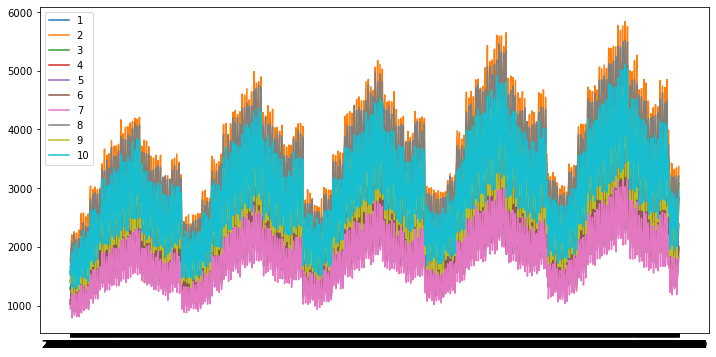

In [48]:
plt.figure(figsize=(12,6))
for store in store_set:
     selected_data = store_daily_sales.loc[df['store'] == store]
     plt.plot(selected_data['date'], selected_data['sales'], label=store)
     
plt.legend()
plt.show()

<AxesSubplot:>

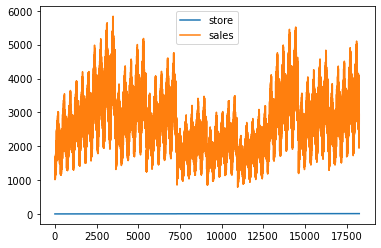

In [40]:
store_daily_sales.plot()